In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
# %matplotlib.inline

In [2]:
path1 = ".\\credit_cards_dataset.csv"
#data = pd.read_excel(path, skiprows=1) # skip the first row of the spreadsheet

path2 = ".\\Data_USD.csv"

#data = pd.read_csv(path, skiprows=1) # skip the first row of the spreadsheet
data1 = pd.read_csv(path1) # skip the first row of the spreadsheet
data2 = pd.read_csv(path2) # skip the first row of the spreadsheet

In [3]:
data2['ID']=np.nan
for i in range(0,30000):
    data2.loc[i,['ID']]=i+1

In [4]:
data2=data2.drop('DEFAULT_PAYMENT_NEXT_MO', axis =1)

In [ ]:
data2.head(3)

In [5]:
#pd.merge(data1, data2, on="key", how="outer")
data_sum = pd.merge(data2, data1, on="ID", how="left")

In [6]:
data_sum.tail(3)

,LIMIT_BAL_US,SEX_x,EDUCATION_x,MARRIAGE_x,AGE_x,PAY_SCORE_AVG,BILL_AVG_US,PAY_AMT_AVG_US,PAY_TO_BILL,CREDIT_UTILIZATION,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29997,1088.571429,1,2,2,37,1.33,426.332952,189.290476,0.44,0.118833,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,2902.857143,1,3,1,41,-0.17,1612.361762,890.094619,0.55,-0.020563,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,1814.285714,1,2,1,46,0.00,1396.238000,50.243619,0.04,0.958580,...,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


In [ ]:
data_sum.shape

In [7]:
#data = data_sum.rename(columns={'default.payment.next.month': 'DEFAULT_NEXT_MONTH'})
data = data_sum

In [ ]:
data.shape

In [8]:
# assign target and inputs for GBM
#y = 'DEFAULT_NEXT_MONTH'
y='default.payment.next.month'
X = [name for name in data.columns if name not in ['ID', 'DEFAULT_PAYMENT_NEXT_MO','SEX_y','EDUCATION_y', 'MARRIAGE_y', 'AGE_y']]
print('y =', y)
print('X =', X)

y = default.payment.next.month
X = ['LIMIT_BAL_US', 'SEX_x', 'EDUCATION_x', 'MARRIAGE_x', 'AGE_x', 'PAY_SCORE_AVG', 'BILL_AVG_US', 'PAY_AMT_AVG_US', 'PAY_TO_BILL', 'CREDIT_UTILIZATION', 'LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month']


In [9]:
#X.shape

AttributeError: 'list' object has no attribute 'shape'

In [10]:
print("Original shape of the data: "+ str(data.shape))
features_names = data.columns

Original shape of the data: (30000, 35)


In [11]:
X = data.drop('default.payment.next.month', axis =1).values
y = data['default.payment.next.month'].values
print(X.shape)
print(y.shape)

(30000, 34)
(30000,)


Split my data into training and testing

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
features_names

Instantiate the random forest model with 200 trees

In [13]:
#rf = RandomForestClassifier(n_estimators=200)
rf = RandomForestClassifier(n_estimators=200,max_features='log2', max_depth=15)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, max_features='log2', n_estimators=200)

Check feature importance


In [14]:
sorted(zip(rf.feature_importances_, features_names), reverse=True)

[(0.10826542265229813, 'PAY_0'),
 (0.08759597537429618, 'PAY_SCORE_AVG'),
 (0.045237110907131124, 'PAY_2'),
 (0.04130574403687517, 'ID'),
 (0.038807694850202086, 'PAY_AMT_AVG_US'),
 (0.03871275839339203, 'CREDIT_UTILIZATION'),
 (0.03466960954929883, 'BILL_AVG_US'),
 (0.03369797802383977, 'PAY_AMT1'),
 (0.03268323535450712, 'BILL_AMT1'),
 (0.030821966366674364, 'BILL_AMT2'),
 (0.030777826104577535, 'PAY_3'),
 (0.02960068440871825, 'BILL_AMT3'),
 (0.028798416919869146, 'PAY_AMT2'),
 (0.028565978626031344, 'AGE_x'),
 (0.028337426239645476, 'BILL_AMT5'),
 (0.02830120289459682, 'BILL_AMT6'),
 (0.02814137531351571, 'AGE_y'),
 (0.028064694793512212, 'BILL_AMT4'),
 (0.027625664029336316, 'PAY_AMT3'),
 (0.026655098284345754, 'PAY_4'),
 (0.02622362110173252, 'LIMIT_BAL'),
 (0.025230792533433407, 'PAY_AMT6'),
 (0.02516575735550816, 'PAY_AMT4'),
 (0.025067141848660407, 'PAY_TO_BILL'),
 (0.024992699104945358, 'LIMIT_BAL_US'),
 (0.024468697503280352, 'PAY_AMT5'),
 (0.01834555947553533, 'PAY_6'),
 (0

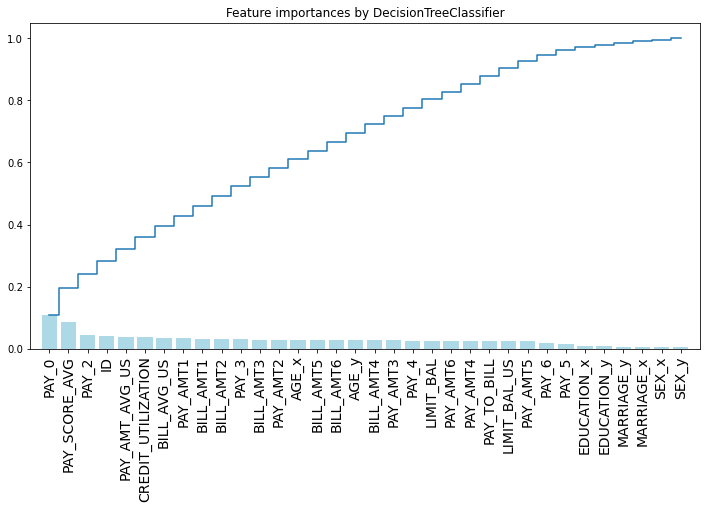

In [15]:
## plot the importances ##
import matplotlib.pyplot as plt
importances = rf.feature_importances_


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), features_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

# Making my prediction and seeing how well my model predicted by checking recall, precision, F1 score and making a confusion matrix.

Recall -tells us generally or overall how well our model predicted based on 
        the total of how much it correctly predicted /correctly predicted +                           how many where actually right but predicted wrong.
                        
                        formula = TP/TP+FN
                        
Precision -tells us or gives us true measure how well our model predicted it                              shows correctly predicted /correctly predicted + how many the model                            predicted to be positive but where false.

                       formula = TP/TP+FP
                       
F1 score - gives us a mean of precision and recall, a sumarization of how well it                        did in respect to recall and precision.


In [16]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [17]:
#Make my predictions
y_prediction = rf.predict(X_test)
y_probability = rf.predict_proba(X_test)
#y_probability[0][1]

In [18]:
print("Recall score:"+ str(recall_score(y_test, y_prediction)))

Recall score:0.3663265306122449


In [19]:
y_prediction.reshape(-1,1)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [20]:
# This shows overall acuracy of how well it will predict defualt or non_default
# The scores corresponding to every class will tell you the accuracy of the classifier 
# in classifying the data points in that particular class compared to all other classes.
# The support is the number of samples of the true response that lie in that class.

print(classification_report(y_test, y_prediction,
                            target_names=["non_default", "default"]))

              precision    recall  f1-score   support

 non_default       0.84      0.95      0.89      7040
     default       0.65      0.37      0.47      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [ ]:
# Creating confusion matrix would give us a ration of non-default compared 
# to default.

In [21]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np

In [22]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

Confusion matrix, without normalization
[[6655  385]
 [1242  718]]


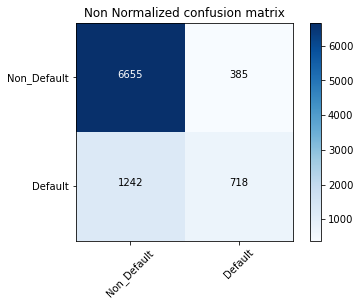

In [23]:
cnf_matrix = confusion_matrix(y_test, y_prediction)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non_Default','Default'], normalize=False,
                      title='Non Normalized confusion matrix')

# Explanation of this confusion matrix
In our confusion matrix, the non-default classification has a total of 2,158 points and defualt clssification has a total of 7,742 points.

It correctly identified 7239 points as default and 503 points as non-default.

Non_default classification incorectly predicted 1480 points as default  and correctly classified 678 points as Non defualt. 


In [ ]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Defualt', 'Non_default'], normalize=True,
                      title='Normalized confusion matrix')


In [ ]:
import pickle
filename = 'RandomForest_model.sav'
pickle.dump(rf, open(filename, 'wb'))